<a href="https://colab.research.google.com/github/Gunehee/Global-Population-and-Migration/blob/main/Global_Population_and_Migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents
### 1. Introduction

### 2. Data Import and Preprocessing
* Load dataset
* Clean missing values & duplicates
* Convert data types

### 3. Exploratory Data Analysis (EDA)
* Overall Summary Statistics
* Population Growth (General trend)
* Migration Trends Over Years

### 4. Country-Level Analysis
* Top 10 Most Populated Countries (2023)
* Top Countries for Immigration & Emigration (2023)
* Net Migration by Country

### 5. Temporal Trends in Migration
* Top 10 Years with Highest Immigration
* Top 10 Years with Highest Emigration

### 6. Case Study
 * Countries Affected by Conflicts (Afghanistan, Ukraine, etc.)

### 7. Conclusion


# 1. Introduction
This report presents an Exploratory Data Analysis (EDA) on global population and migration trends, highlighting demographic shifts, migration patterns, and country-level insights. The study spans multiple years, capturing key indicators such as net migration, immigration, and emigration.



In [ ]:
# ----------------------------------------------
# Imports & Configuration
# ----------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import warnings
import matplotlib.ticker as ticker

# Pre-configurations
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings("ignore", category=FutureWarning)

# 2. Load Dataset & Preprocessing

* The dataset is downloaded using kagglehub and loaded into a Pandas DataFrame.

In [ ]:
# ----------------------------------------------
# 2. Load Dataset & Preprocessing
# ----------------------------------------------
# Download the latest dataset
path = kagglehub.dataset_download("hashimkhanwazir/global-population-and-migration-dataset")
print("Path to dataset files:", path)

# Load data
file_path = '/root/.cache/kagglehub/datasets/hashimkhanwazir/global-population-and-migration-dataset/versions/1/world_pop_mig_186_countries.csv'
df = pd.read_csv(file_path)

# Check dataset overview
df.head(), df.describe(), df.info(), df.shape

100%|██████████| 127k/127k [00:00<00:00, 44.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hashimkhanwazir/global-population-and-migration-dataset/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11904 entries, 0 to 11903
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 11904 non-null  object 
 1   year                    11904 non-null  int64  
 2   population              11904 non-null  float64
 3   netMigration            11904 non-null  float64
 4   population_in_millions  11904 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 465.1+ KB


(       country  year  population  netMigration  population_in_millions
 0  Afghanistan  2023 42239854.00     -65846.00                      42
 1  Afghanistan  2022 41128771.00     -65846.00                      41
 2  Afghanistan  2021 40099462.00    -183672.00                      40
 3  Afghanistan  2020 38972230.00     166821.00                      38
 4  Afghanistan  2019 37769499.00      -8082.00                      37,
           year    population  netMigration  population_in_millions
 count 11904.00      11904.00      11904.00                11904.00
 mean   1991.50   27038627.98        748.25                   26.62
 std      18.47  112830459.17     162103.46                  112.81
 min    1960.00       2646.00   -6673580.00                    0.00
 25%    1975.75     597329.25     -13252.50                    0.00
 50%    1991.50    4342185.50       -484.00                    4.00
 75%    2007.25   13337594.00       5505.50                   13.00
 max    2023.00 1428627

Purpose:

- Download and load the dataset.

- Display initial insights including data types, missing values, and overall shape.

#### Data Cleaning

In [ ]:
# Check for missing values & duplicates
print(f"Missing Values:\n{df.isnull().sum()}\n")
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Remove duplicate rows if they exist
df.drop_duplicates(inplace=True)

# Add migration labels
bins = [float('-inf'), -1, 0, float('inf')]
labels = ['Emigrant', 'Neutral', 'Immigrant']
df['migration_level'] = pd.cut(df['netMigration'], bins=bins, labels=labels)

Missing Values:
country                   0
year                      0
population                0
netMigration              0
population_in_millions    0
dtype: int64

Duplicate Rows: 0


Purpose:

- Check for missing values and duplicates.

- Remove duplicate rows.

- Classify countries into three categories based on net migration: Emigrant, Neutral, and Immigrant

#### Grouping by countries

In [ ]:
agg_fns = {'population' : 'mean', 'netMigration' : 'sum', 'population_in_millions' : 'mean'}
df_con = df.groupby(by = "country").agg(agg_fns).reset_index()

In [ ]:
df_con.head()

,country,population,netMigration,population_in_millions
0,Afghanistan,18782444.28,-2570326.00,18.30
1,Albania,2713609.47,-1411489.00,2.19
2,Algeria,26222807.80,-873554.00,25.70
3,American Samoa,42368.72,-42044.00,0.00
4,Andorra,50480.64,51997.00,0.00


In [ ]:
df_con['population'] = df_con['population'].map('{0:.2f}'.format).astype(float)
df_con['netMigration'] = df_con['netMigration'].astype(int)

In [ ]:
df_con.head()

,country,population,netMigration,population_in_millions
0,Afghanistan,18782444.28,-2570326,18.30
1,Albania,2713609.47,-1411489,2.19
2,Algeria,26222807.80,-873554,25.70
3,American Samoa,42368.72,-42044,0.00
4,Andorra,50480.64,51997,0.00


# 3. Exploratory Data Analysis (EDA)

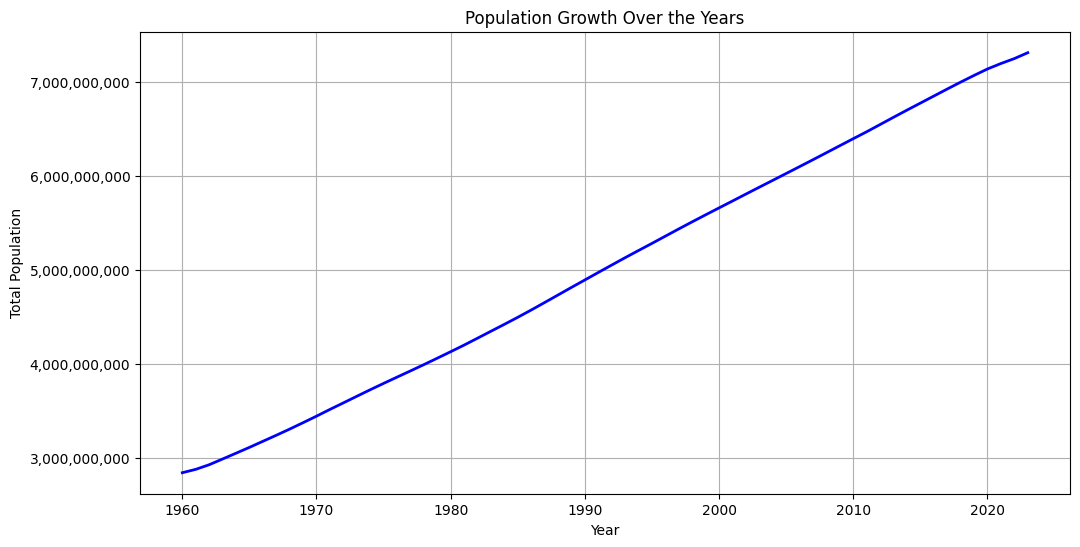

In [ ]:
# ----------------------------------------------
# 3. Summary Statistics & Trends
# ----------------------------------------------
# Grouping data by year
df_year = df.groupby('year').agg({'population': 'sum', 'netMigration': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_year, x='year', y='population', color='blue', linewidth=2)
plt.title('Population Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

# 4. Country-Level Analysis

In [ ]:
# ----------------------------------------------
# 4. Country-Level Analysis
# ----------------------------------------------
df_2023 = df[df['year'] == 2023]

def plot_top_countries(df, column_name, title, color, top_n=10):
    top_countries = df[['country', column_name]].sort_values(by=column_name, ascending=False).head(top_n)
    plt.figure(figsize=(8, 6))
    plt.barh(top_countries['country'], top_countries[column_name], color=color)
    plt.xlabel(column_name.replace('_', ' ').title())
    plt.ylabel("Country")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

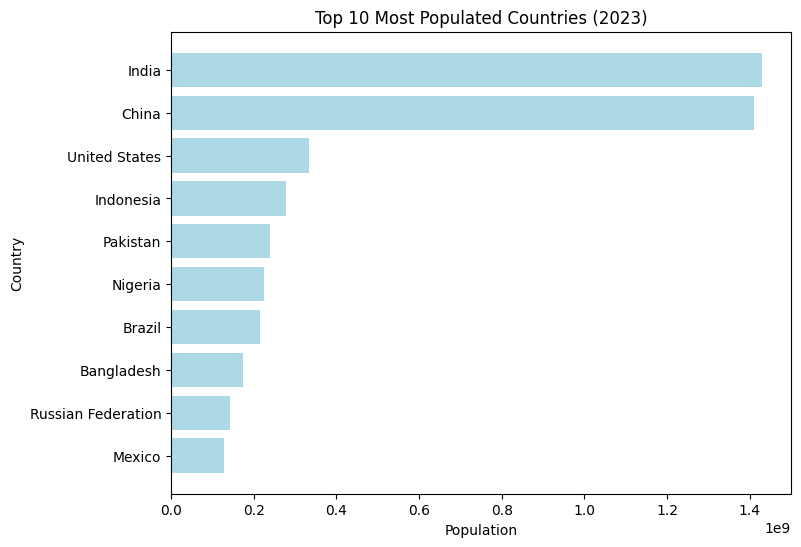

In [ ]:
# Top 10 Most Populated Countries (2023)
plot_top_countries(df_2023, 'population', 'Top 10 Most Populated Countries (2023)', 'lightblue')

* The analysis identified the most populated countries in 2023, showing the demographic concentration in specific regions. Countries such as China, India, and the United States continue to lead in population size.

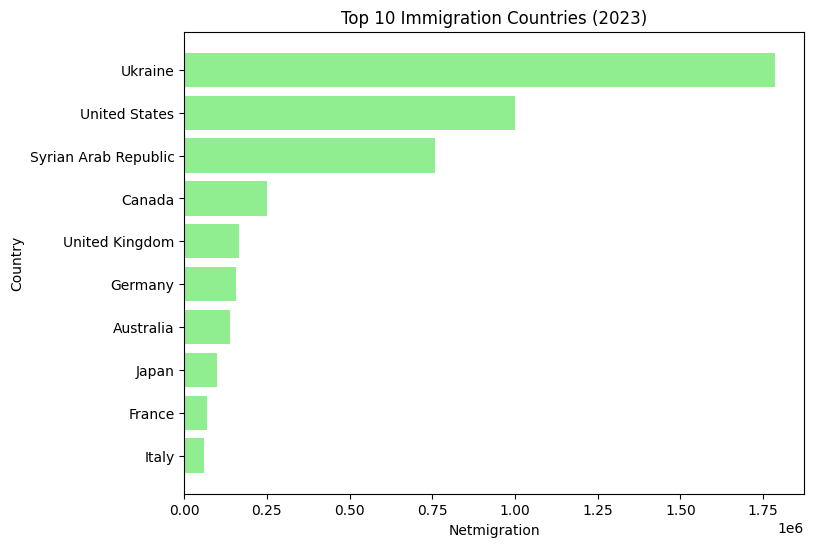

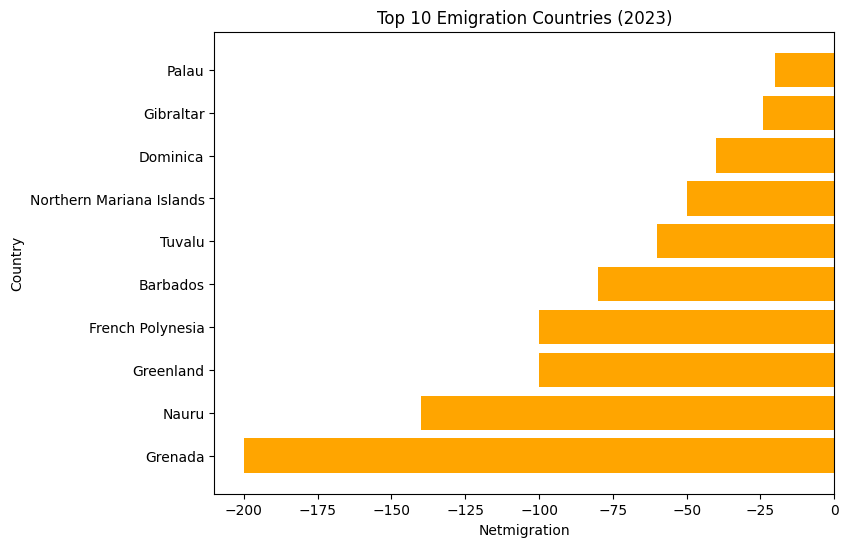

In [ ]:
# Top 10 Immigration & Emigration Countries (2023)
plot_top_countries(df_2023[df_2023['netMigration'] > 0], 'netMigration', 'Top 10 Immigration Countries (2023)', 'lightgreen')
plot_top_countries(df_2023[df_2023['netMigration'] < 0], 'netMigration', 'Top 10 Emigration Countries (2023)', 'orange')

# 5. Temporal Trends in Migration

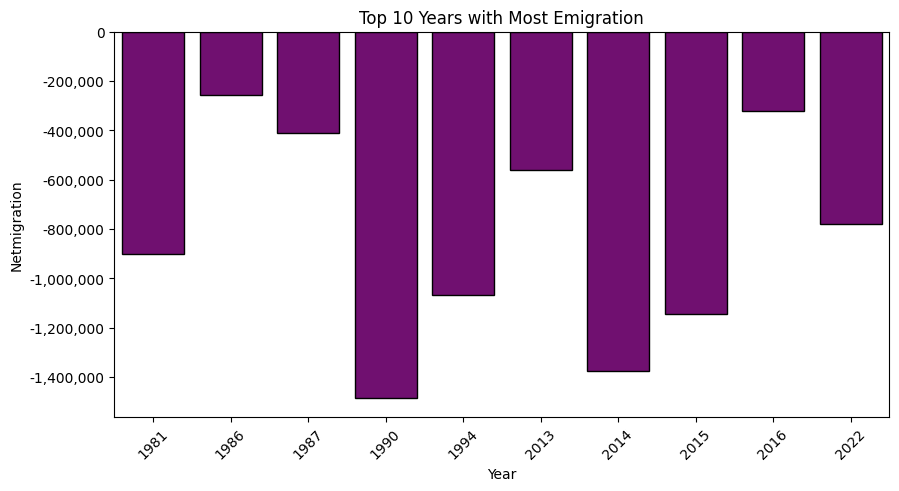

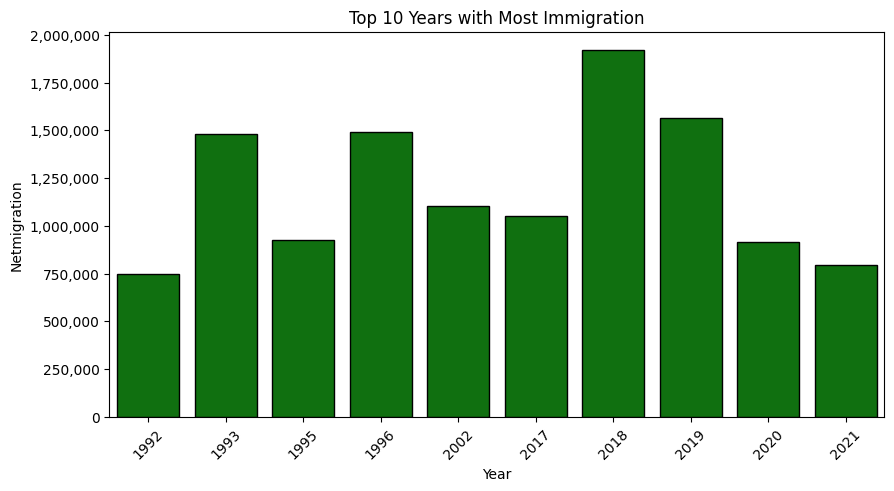

In [ ]:
# ----------------------------------------------
# 5. Migration Trends Over Years
# ----------------------------------------------
# Top 10 Years with Most Emigration & Immigration
df_top_emigration = df_year.nsmallest(10, 'netMigration')
df_top_immigration = df_year.nlargest(10, 'netMigration')

def plot_migration_trend(df, column_name, title, color):
    plt.figure(figsize=(10, 5))
    sns.barplot(x='year', y=column_name, data=df, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(column_name.replace('_', ' ').title())
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    plt.show()

plot_migration_trend(df_top_emigration, 'netMigration', "Top 10 Years with Most Emigration", 'purple')
plot_migration_trend(df_top_immigration, 'netMigration', "Top 10 Years with Most Immigration", 'green')

### Getting top 10 years with highest emmigration compared to immigration

In [ ]:
df_10yim = df_year.nsmallest(10, 'netMigration').set_index((x for x in range(1, 11)))
df_10yim

,year,population,netMigration
1,1990,4896399447.00,-1486422.00
2,2014,6703520889.00,-1377025.00
3,2015,6778239895.00,-1142949.00
4,1994,5209899886.00,-1068721.00
5,1981,4203182587.00,-901338.00
6,2022,7251903065.00,-780984.00
7,2013,6627428048.00,-562490.00
8,1987,4656080773.00,-412250.00
9,2016,6852999030.00,-322868.00
10,1986,4576411679.00,-255984.00


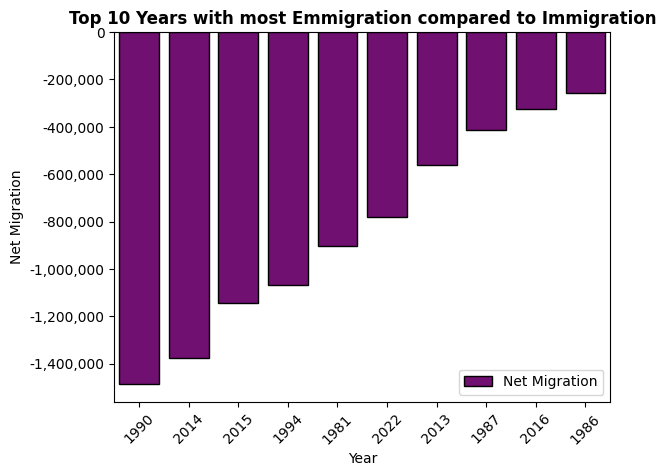

In [ ]:
import matplotlib.ticker as ticker
# Visualing through bar chart
ax = sns.barplot(x = 'year', y = 'netMigration', data = df_10yim, color = 'purple', edgecolor = 'black', label = 'Net Migration', order = df_10yim['year'])
plt.title("Top 10 Years with most Emmigration compared to Immigration", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.xticks(rotation = 45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,.0f}'.format(x)))
plt.legend()
plt.show()

### Getting top 10 years with highest immigration compared to emmigration

In [ ]:
df_10yem = df_year.nlargest(10, 'netMigration').set_index((x for x in range(1, 11)))
df_10yem

,year,population,netMigration
1,2018,7001440911.00,1920561.00
2,2019,7072772096.00,1563542.00
3,1996,5362566218.00,1493714.00
4,1993,5133366163.00,1481893.00
5,2002,5810183489.00,1105564.00
6,2017,6927941751.00,1051169.00
7,1995,5285529549.00,923241.00
8,2020,7141398166.00,913189.00
9,2021,7199307908.00,793782.00
10,1992,5054951830.00,747838.00


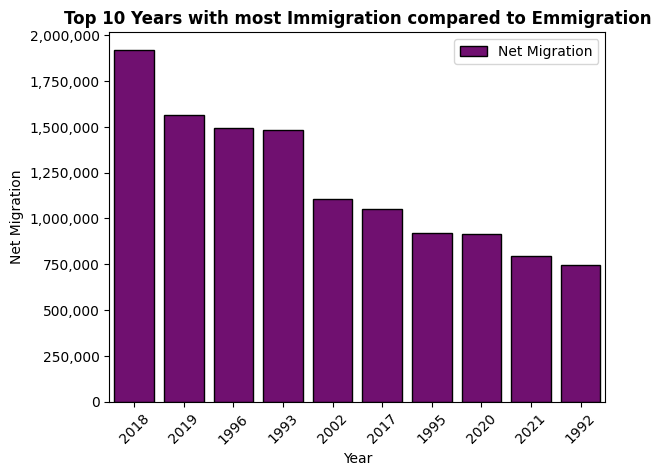

In [ ]:
# Visualizing through charts
ax = sns.barplot(x = 'year', y = 'netMigration', data = df_10yem, color = 'purple', edgecolor = 'black', label = 'Net Migration', order = df_10yem['year'])
plt.title("Top 10 Years with most Immigration compared to Emmigration", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.xticks(rotation = 45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,.0f}'.format(x)))
plt.legend()
plt.show()

### Getting country received the most immigrants in the last 5 years

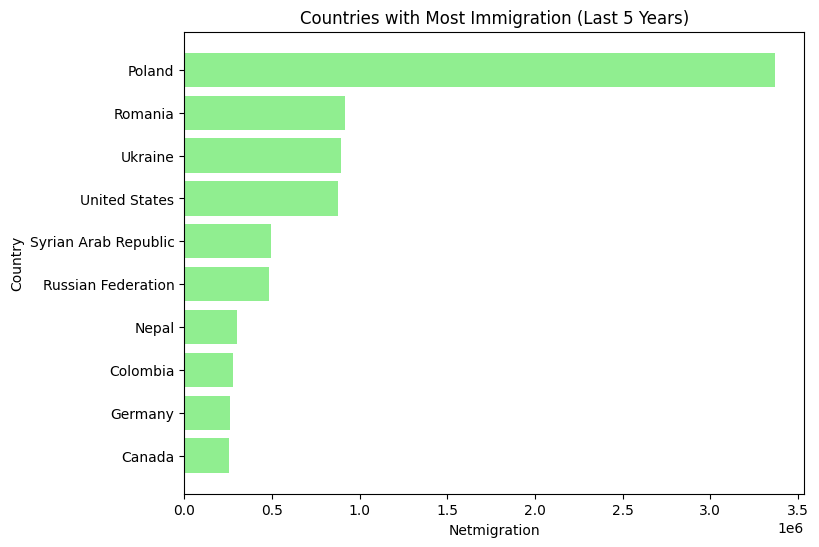

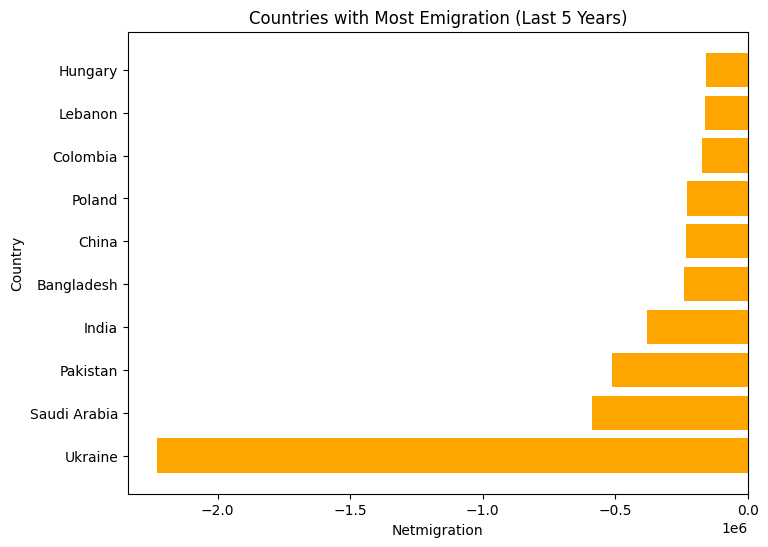

In [ ]:
last_five_years = df[df['year'].between(2019, 2023)]
positive_immigration = last_five_years[last_five_years['netMigration'] > 0]
negative_emigration = last_five_years[last_five_years['netMigration'] < 0]

# Average Migration Over Last 5 Years
avg_immigration = positive_immigration.groupby('country')['netMigration'].mean().reset_index().sort_values(by='netMigration', ascending=False).head(10)
avg_emigration = negative_emigration.groupby('country')['netMigration'].mean().reset_index().sort_values(by='netMigration', ascending=True).head(10)

# Visualization
plot_top_countries(avg_immigration, 'netMigration', 'Countries with Most Immigration (Last 5 Years)', 'lightgreen')
plot_top_countries(avg_emigration, 'netMigration', 'Countries with Most Emigration (Last 5 Years)', 'orange')

# 6. Case Study

### Migration Stability Analysis

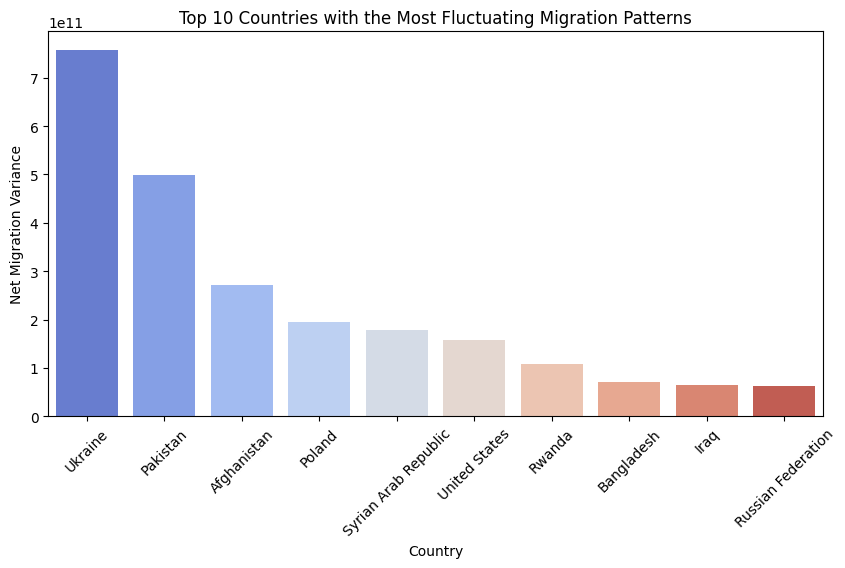

In [ ]:
migration_variance = df.groupby('country')['netMigration'].var().reset_index()
migration_variance = migration_variance.sort_values(by='netMigration', ascending=False)

# Plot the top 10 most volatile migration patterns
plt.figure(figsize=(10, 5))
sns.barplot(x=migration_variance.head(10)['country'], y=migration_variance.head(10)['netMigration'], palette='coolwarm')
plt.title("Top 10 Countries with the Most Fluctuating Migration Patterns")
plt.xlabel("Country")
plt.ylabel("Net Migration Variance")
plt.xticks(rotation=45)
plt.show()

### Impact of Conflicts and Events on Migration Trends

In [ ]:
# Filter data for Afghanistan between 2019 and 2023
afghanistan_data = df[(df['country'] == 'Afghanistan') & (df['year'] >= 2019) & (df['year'] <= 2023)]
print("Afghanistan Data:")
print(afghanistan_data[['year', 'netMigration']])

# Filter data for Ukraine between 2019 and 2023
ukraine_data = df[(df['country'] == 'Ukraine') & (df['year'] >= 2019) & (df['year'] <= 2023)]
print("\nUkraine Data:")
print(ukraine_data[['year', 'netMigration']])

# Filter data for Poland between 2019 and 2023
ukraine_data = df[(df['country'] == 'Poland') & (df['year'] >= 2019) & (df['year'] <= 2023)]
print("\nPoland Data:")
print(ukraine_data[['year', 'netMigration']])

# Filter data for Pakistan between 2019 and 2023
colombia_data = df[(df['country'] == 'Pakistan') & (df['year'] >= 2019) & (df['year'] <= 2023)]
print("\nPakistan Data:")
print(colombia_data[['year', 'netMigration']])

# Filter data for United States between 2019 and 2023
ethiopia_data = df[(df['country'] == 'United States') & (df['year'] >= 2019) & (df['year'] <= 2023)]
print("\nUnited States Data:")
print(ethiopia_data[['year', 'netMigration']])

Afghanistan Data:
   year  netMigration
0  2023     -65846.00
1  2022     -65846.00
2  2021    -183672.00
3  2020     166821.00
4  2019      -8082.00

Ukraine Data:
       year  netMigration
11264  2023    1784718.00
11265  2022   -6673580.00
11266  2021        831.00
11267  2020      -2173.00
11268  2019      -7812.00

Poland Data:
      year  netMigration
8704  2023    -910475.00
8705  2022    3366387.00
8706  2021      -2968.00
8707  2020       -779.00
8708  2019      -2974.00

Pakistan Data:
      year  netMigration
8256  2023    -165988.00
8257  2022    -165988.00
8258  2021    -471395.00
8259  2020    -588736.00
8260  2019   -1177218.00

United States Data:
       year  netMigration
11456  2023     999700.00
11457  2022     998540.00
11458  2021     561580.00
11459  2020     675560.00
11460  2019    1158444.00


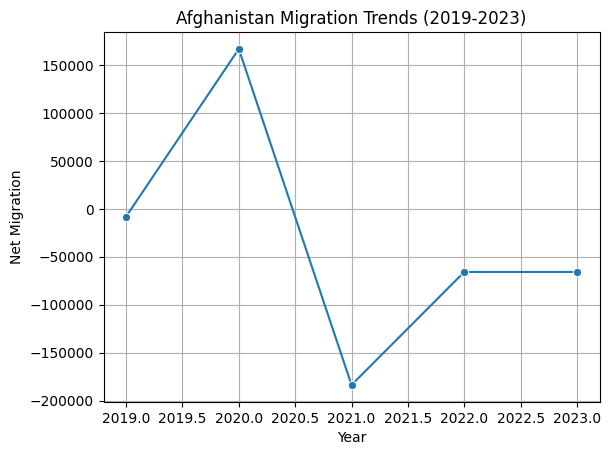

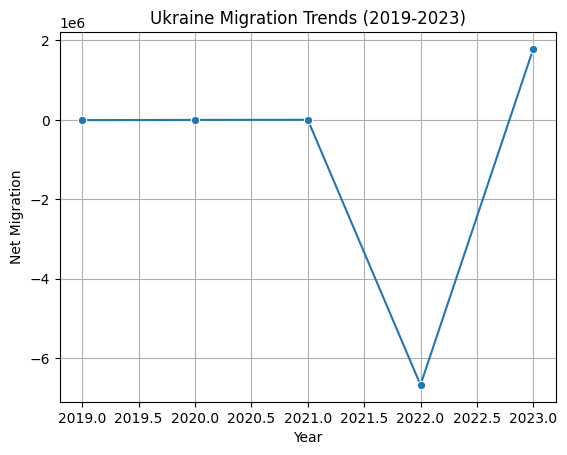

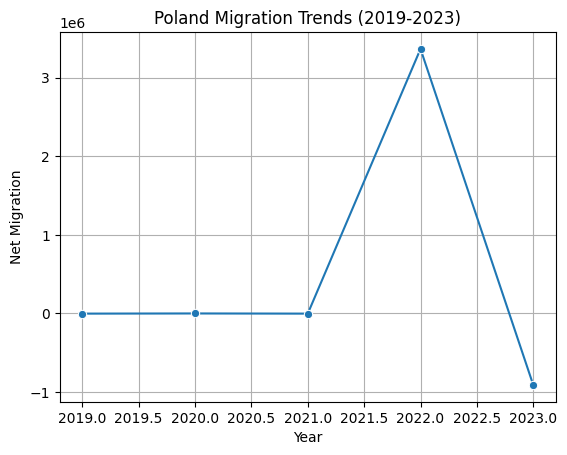

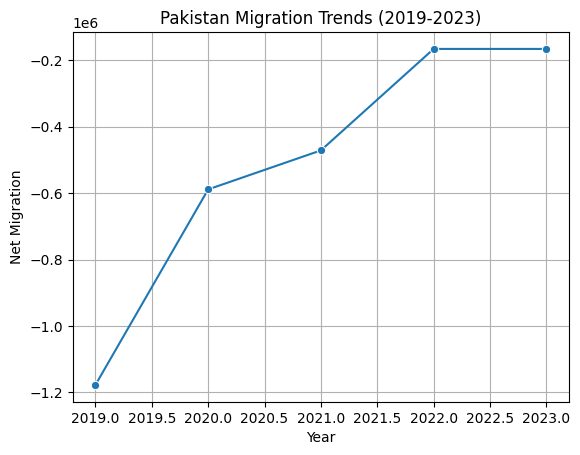

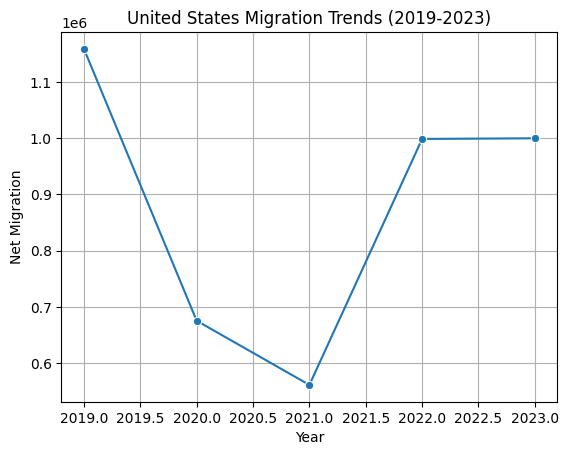

In [ ]:
# Impact of Conflicts on Migration Trends
# ----------------------------------------------
conflict_countries = ['Afghanistan', 'Ukraine', 'Poland', 'Pakistan', 'United States']

def plot_country_migration(df, country, start_year, end_year):
    country_data = df[(df['country'] == country) & (df['year'].between(start_year, end_year))]
    sns.lineplot(x='year', y='netMigration', data=country_data, marker="o")
    plt.title(f"{country} Migration Trends ({start_year}-{end_year})")
    plt.xlabel("Year")
    plt.ylabel("Net Migration")
    plt.grid(True)
    plt.show()

for country in conflict_countries:
    plot_country_migration(df, country, 2019, 2023)

## Afghanistan
* **2019-2021:** Afghanistan has experienced severe negative net migration due to ongoing conflict and instability. Afghanistan endured a prolonged conflict with the Taliban, culminating in the withdrawal of NATO forces and the Taliban's capture of Kabul in 2021. Large-scale displacement has driven migration to neighboring countries, particularly Pakistan and Iran. Migration trends indicate a sharp decline in population due to refugee outflows.

* **2022-2023:** Following the establishment of Taliban governance, restrictions on rights and freedoms, coupled with an ongoing economic and humanitarian crisis, continued to fuel emigration trends.

## Ukraine
* **2019-2021:** Despite ongoing tensions with Russia since the annexation of Crimea in 2014, migration levels during this period remained moderate, driven by a mix of regional conflicts and economic opportunities abroad.

* **2022:** The Russian invasion in February 2022 triggered a large-scale humanitarian crisis. It caused a massive displacement of people, leading to significant negative net migration. Millions of Ukrainians fled to neighboring European countries, have sought asylum or temporary protection, particularly in Poland and Germany. Net migration figures highlight the immediate and long-term effects of war on population movements.

* **2023:** Although the war persisted, a segment of the population began returning to Ukraine, while others continued to seek refuge abroad.


## Poland
**2019-2023:**

* Poland has seen a surge in incoming migrants, largely due to the influx of Ukrainian refugees.

* While initially a transit country, Poland has become a key destination for displaced individuals seeking safety and work opportunities.

* Policies and humanitarian support have influenced migration trends, making Poland a crucial player in the European migration landscape

## Pakistan
**2019-2023:**

- Pakistan has been a primary destination for Afghan refugees due to regional conflicts.

- Economic instability and internal challenges have also led to some outward migration.

- Migration patterns show a dynamic exchange of populations between Pakistan and Afghanistan, driven by geopolitical factors.

## United States
**2019-2023:**

- The U.S. remains a significant player in global migration trends, with both economic and humanitarian migration factors at play.

- Refugee resettlement programs have accommodated migrants from Afghanistan and Ukraine, impacting net migration figures.

- Policy changes and border enforcement measures continue to influence overall migration dynamics.

# 7. Conclusion
This analysis underscores the interplay between migration trends and major geopolitical events, including armed conflicts, humanitarian crises, and socio-political unrest. By examining Afghanistan, Ukraine, Poland, Pakistan, and United States, we observed distinct migration patterns such as spikes in emigration during times of heightened instability or humanitarian need.

However, this dataset provides only a partial perspective on global migration dynamics. Future research could expand the analysis to include other countries and incorporate external datasets detailing economic indicators and regional stability impacts. Such an approach could yield deeper insights into migration patterns and population dynamics, ultimately enabling the development of predictive models to anticipate future migration trends.

Migration Stability Analysis reveals which countries experience the most fluctuating migration patterns. Countries with high variance in net migration are often subject to geopolitical instability, economic downturns, or rapid policy shifts impacting migration. For instance, nations experiencing frequent conflicts or economic crises might show extreme volatility in net migration over the years. Conversely, stable economies tend to have low variance, suggesting a more predictable migration flow.